# Cartooning an Image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Load the image

In [2]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

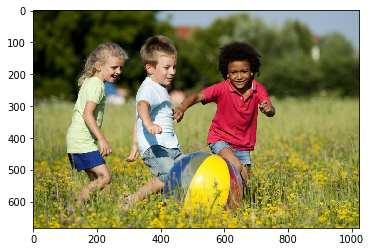

In [3]:
filename = "child.jpg"
img=read_file(filename)


org_img=np.copy(img)

## Create Edge Mask

In [4]:
from sklearn.cluster import KMeans

In [5]:
def edge_mask(img , line_size, blur_value):
    """
    input: Input Image
    Outut: Edges of Images
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C ,cv2.THRESH_BINARY, line_size , blur_value)
    
    return edges

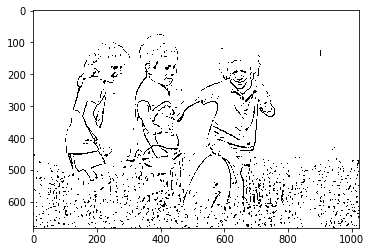

In [6]:
line_size, blur_value = 7,7
edges = edge_mask(img , line_size, blur_value)     

plt.imshow(edges , cmap = "gray")
plt.show()

## Reduce the Color palette

In [7]:
def color_quantization(img , k):
    
    
    # Transform the image
    data = np.float32(img).reshape((-1,3))
    
    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    
    #Implementing K-Means
    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    

    result=center[label.flatten()]
    result=result.reshape(img.shape)
    
    return result

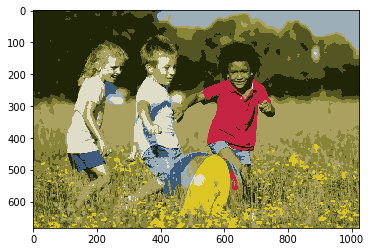

In [8]:
img=color_quantization(img,k=9)
 #k values gives the no.of colors in img
    
plt.imshow(img)
plt.show()

## Reduce the noise

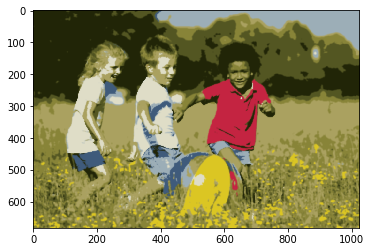

In [9]:
blurred=cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)

plt.imshow(blurred)              #diameter
plt.show()

## Combine Edge Mask with the quantiz image

In [10]:
def cartoon():
    c = cv2.bitwise_and(blurred , blurred , mask= edges )
    
    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()
    
    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()

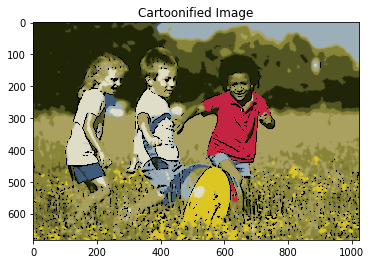

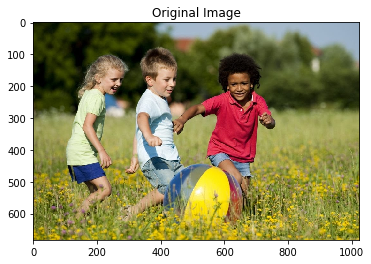

In [11]:
cartoon()